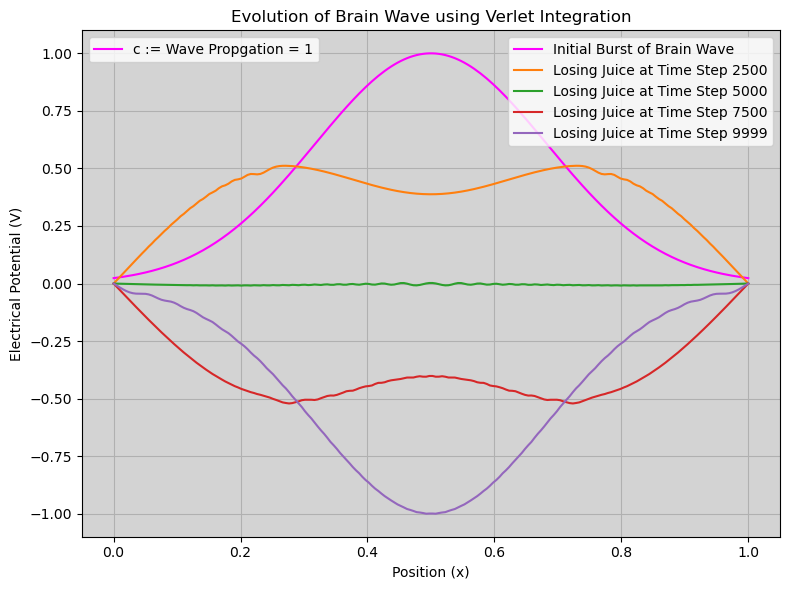

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and constants
L = 1  # Length of the tissue slice
c = 1  # Propagation speed, arbitrary for this model
alpha = 15  # Width of the Gaussian for initial condition
N = 200
dx = L / N
x_values = np.linspace(0, L, N)
dt = 0.0001  # Time step size
N_ts = 10000  # Total number of time steps for the simulation


# Define the initial condition functions
def H_0(x):
    return np.exp(-alpha * (x - L/2)**2)

def Ht0(x):
    return np.zeros_like(x)

# Initial conditions in spatial domain
V_initial = H_0(x_values)
V_velocity_initial = Ht0(x_values)

# Implementing the Verlet method
V_current = V_initial
V_prev = V_initial - dt * V_velocity_initial

V_over_time = [V_initial]

for _ in range(N_ts):
    V_next = 2*V_current - V_prev + (c**2 * dt**2 / dx**2) * (np.roll(V_current, 1) - 2*V_current + np.roll(V_current, -1))
    
    # Apply boundary conditions
    V_next[0] = V_next[-1] = 0
    
    V_over_time.append(V_next)
    
    # Update for next iteration
    V_prev = V_current
    V_current = V_next

# Visualizing the evolution of the potential
selected_steps = [0, int(N_ts/4), int(N_ts/2), int(3*N_ts/4), N_ts-1]

plt.figure(figsize=(8, 6))

lines = []  # List to hold the line objects for the first legend
labels = []  # List to hold the labels for the first legend

for step in selected_steps:
    if step == 0:  # or whatever value represents the first time step in your data
        label = 'Initial Burst of Brain Wave'

    elif step == 500:
        label = 'Equilibrium? at Time Step 500'
    else:
        label = f'Losing Juice at Time Step {step}'
    line, = plt.plot(x_values, V_over_time[step], label=label)
    
    lines.append(line)
    labels.append(label)

lines[0].set_color('magenta')
# First legend
legend1 = plt.legend(lines, labels, loc='upper right')
plt.gca().add_artist(legend1)

# Second legend
plt.legend([lines[0]], ['c := Wave Propgation = 1'], loc='upper left')
plt.xlabel("Position (x)")
plt.ylabel("Electrical Potential (V)")
plt.title("Evolution of Brain Wave using Verlet Integration")
plt.grid(True)
plt.gca().set_facecolor('lightgrey')
#plt.legend()
plt.tight_layout()
plt.show()
